# Automatic differentiation

__Automatic differentiation__ is a method for evaluating the rate of change in the numerical output of a program with respect to the rate of change in its input. We start with an example.

Consider the function
$$
f(x) = \cos(x)\sin(x)
$$

When we want to evaluate the function numerically at a specific $x$, say $x=1$ we can implement a computer program like
~~~
x = 1
f = cos(x)*sin(x)
~~~

or 

~~~
def g(x):
    return cos(x)*sin(x)
    
x = 1
f = g(x)
~~~

Now suppose we need the derivative as well, that is how much $f$ changes when we slightly change $x$. For this example, it is a simple exercise to calculate the derivative symbolically as 
$$
f'(x) = \cos(x)\cos(x) -\sin(x)\sin(x) = \cos(x)^2 - \sin(x)^2
$$
and code this explicitely as
~~~
x = 1
df_dx =  cos(x)*cos(x) - sin(x)*sin(x)
~~~

But could we have calculated the derivative without coding it up explicitely, that is without symbolically evaluating it a priori by hand? For example, can we code just
~~~
x = 1
f = my.cos(x)*my.sin(x)
df_dx = f.derivative()
~~~
or 

~~~
def g(x):
    return my.cos(x)*my.sin(x)

x = 1
f = g(x)
df_dx = f.derivative()
~~~

to get what we want, perhaps by overloading the appropriate variables, functions and operators? The answer turns out to be yes and it is a quite fascinating subject called __automatic differentiation__. Interestingly, this algorithm, known also as __backpropagation__, is in the core of todays artificial intelligence systems, programs that learn how to program themselves from input and output examples. See https://www.youtube.com/watch?v=aircAruvnKk for an introduction to a particular type of model, known as a __neural network__.


To symbolically evaluate the derivative, we use the chain rule. The chain rule dictates that when
$$
f(x) = g(h(x))
$$
the derivative is given as
$$
f'(x) = g'(h(x)) h'(x)
$$

We could implement this program as 
~~~
x = 1
h = H(x)
g = G(h)
f = g
~~~
where we have used capital letters for the functions -- beware that the function and its output is always denoted with the same letter in mathematical notation. To underline the underlying mechanism of automatic differentiation. We will always assign the output of a function to a variable so we will only think of the rate of change of a variable with respect to another variable, rather than 'derivatives of functions'. To be entirely formal we write 
~~~
x = 1
h = H(x)
g = G(h)
f = identitiy(g)
~~~
and denote the identity function as $(\cdot)$. This program can be represented also by the following directed computation graph:

<img src="../latex_figures/chainrule.png" width="400">

The derivative is denoted by
$$
f'(x)  =  \frac{df}{dx}
$$
As we will later use multiple variables, we will already introduce the partial derivative notation, that is equivalent to the derivative for scalar functions.
$$
f'(x)  =  \frac{\partial f}{\partial x}
$$

The chain rule, using the partial derivative notation can be stated as
\begin{eqnarray}
\frac{\partial f}{\partial x} & = &  \frac{\partial h}{\partial x} \frac{\partial g}{\partial h} \frac{\partial f}{\partial g} \\
& = & h'(x) g'(h(x)) \cdot 1
\end{eqnarray}

This quantity is actually just a product of numbers, so we could have evaluated this derivative in the following order
\begin{eqnarray}
\frac{\partial f}{\partial x} & = & \frac{\partial h}{\partial x} \left(\frac{\partial g}{\partial h} \left(\frac{\partial f}{\partial g} \frac{\partial f}{\partial f} \right) \right) \\
& =& \frac{\partial h}{\partial x} \left(\frac{\partial g}{\partial h} \frac{\partial f}{\partial g} \right) \\
& = &\frac{\partial h}{\partial x} \frac{\partial f}{\partial h}  \\
& = &\frac{\partial f}{\partial x} 
\end{eqnarray}
where we have included $\partial f/\partial f = 1$ as the boundry case.

<img src="../latex_figures/chainrule_with_df.png" width="470">

So, we could imagine calculating the derivative using the following program

~~~
df_df = 1
df_dg = 1 * df_df
df_dh = dG(h) * df_dg  
df_dx = dH(x) * df_dh  
~~~

If $g$ and $h$ are elementary functions, their derivatives are known in closed form and can be calculated from their input(s) only.

As an example, consider
$$
f(x) = \sin(\cos(x))
$$

The derivative is
$$
\frac{\partial f}{\partial x}  =  -\sin(x) \cos(\cos(x)) 
$$

~~~
df_df =  1
df_dg =  1 * df_df
df_dh =  cos(h) * df_dg  
df_dx = -sin(x) * df_dh  
~~~

As $h=\cos(x)$, it can be easily verified that the derivative is calculated correctly.

### Functions of two or more variables
When we have functions of two or more variables the notion of a derivative changes. For example, when 
$$
g(x_1, x_2)
$$
we define the partial derivatives
\begin{eqnarray}
\frac{\partial g}{\partial x_1} & , &  \frac{\partial g}{\partial x_2}
\end{eqnarray}

The collection of partial derivatives can be organized as a vector. This object is known as the __gradient__ and is denoted as
\begin{eqnarray}
\nabla g(x) \equiv \left(\begin{array}{c} \frac{\partial g}{\partial x_1} \\ \frac{\partial g}{\partial x_2} \end{array} \right) 
\end{eqnarray}

When taking the partial derivative, we assume that all the variables are constant, apart from the one that we are taking the derivative with respect to.

For example,
$$
g(x_1, x_2) = \cos(x_1)e^{3 x_2}
$$
When taking the (partial) derivative with respect to $x_1$, we assume that the second factor is a constant
$$
\frac{\partial g}{\partial x_1} = -\sin(x_1) e^{3 x_2}
$$
Similarly, when taking the partial derivative with respect to $x_2$, we assume that the first factor is a constant
$$
\frac{\partial g}{\partial x_2} = 3 \cos(x_1) e^{3 x_2}
$$


The chain rule for multiple variables is in a way similar to the chain rule for single variable functions but with a caveat: the derivatives over all paths between the two variables need to be added.

Another example is
$$
f(x) = g(h_1(x), h_2(x)) 
$$
Here, the partial derivative is 
$$
\frac{\partial g}{\partial x} = \frac{\partial g}{\partial h_1} \frac{\partial h_1}{\partial x} +   \frac{\partial g}{\partial h_2} \frac{\partial h_2}{\partial x}
$$
The chain rule has a simple form
$$
\frac{\partial f}{\partial x}  = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x} 
$$


To see a concrete example of a function of form $f(x) = g(h_1(x), h_2(x)) $, consider 
$$
f(x) = \sin(x)\cos(x)
$$

We define 
\begin{align}
h_1(x) & = c = \cos(x) \\
h_2(x) & = s = \sin(x) \\
g(c,s) & = g = c \times s \\
f & = g(c,s)
\end{align}

that is equivalent to the following program, written deliberately as a sequence of scalar function evaluations and binary operators only
~~~
x = 1
c = cos(x)
s = sin(x)
g = c * s
f = g
~~~

This program can be represented by the following directed computation graph:
<img src="cos_sin.png" width="600">

The function can be evaluated by traversing the variable nodes of the directed graph from the inputs to the outputs in the topological order. At each variable node, we merely evaluate the incoming function. Topological order guarantees that the inputs for the function are already calculated. 

It is not obvious, but the derivatives can also be calculated easily. By the chain rule, we have 
\begin{eqnarray}
\frac{\partial f}{\partial x} &=& \frac{\partial f}{\partial g} \frac{\partial g}{\partial c} \frac{\partial c}{\partial x} +  \frac{\partial f}{\partial g} \frac{\partial g}{\partial s} \frac{\partial s}{\partial x} \\
&=& 1 \cdot s \cdot \sin(x) +  1 \cdot c \cdot (-\cos(x)) \\
&=& 1 \cdot \sin(x) \cdot \sin(x) +  1 \cdot \cos(x) \cdot (-\cos(x)) \\
\end{eqnarray}

The derivative could have been calculated numerically by the following program

~~~
df_dx = 0, df_ds = 0, df_dc = 0, df_dg = 0 
df_df = 1

df_dg +=  df_df           // df/dg = 1
df_dc +=  s * df_dg       // dg/dc = s
df_ds +=  c * df_dg       // dg/ds = c
df_dx +=  cos(x) * df_ds  // ds/dx = cos(x)
df_dx += -sin(x) * df_dc  // dc/dx = -sin(x)
~~~

Note that the total derivative consists of sums of several terms. Each term is the product of the derivatives along the path leading from $f$ to $x$. In the above example, there are only two paths: 

- $f,g,c,x$
- $f,g,s,x$

$$
\frac{\partial f}{\partial x}  = \frac{\partial f}{\partial g} \frac{\partial g}{\partial c} \frac{\partial c}{\partial x} +  \frac{\partial f}{\partial g} \frac{\partial g}{\partial s} \frac{\partial s}{\partial x}
$$

It is not obvious in this simple example but the fact that we are propagating backwards makes us save computation by storing the intermediate variables.

This program can be represented by the following directed computation graph:
<img src="cos_sin_with_df.png" width="700">

Note that during the backward pass, if we traverse variable nodes in the reverse topological order, we only need the derivatives already computed in previous steps and values of variables that are connected to the function node that are computed during the forward pass. As an example, consider

$$
\frac{\partial f}{\partial c} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial c}
$$
The first term is already available during the backward pass. The second term needs to be programmed by calculating the partial derivative of $g(s,c) = sc$ with respect to $c$. It has a simple form, namely $s$. More importantly, the numerical value is also immediately available, as it is calculated during the forward pass. For each function type, this calculation will be different but is nevertheless straightforward for all basic functions, including the binary arithmetic operators $+,-,\times$ and $\div$.


# Programming Assignment

In this exercise, you will write a program that gets two input files.  The first file will be the function definition file, the second will be the input values for which the function and its derivative is to be calculated

## Function Definition File
The function definition file will have the following format:
~~~
<inputs>
<output>
<assignments>
~~~

An example is the following for the function
$$
f(x_1, x_2)  =  \sin(2x_1)\cos(x_1 x_2)
$$

~~~
input x_1
input x_2
output f
t_0 = mult 2 x_1
t_1 = sin  t_0
t_2 = mult x_1 x_2
t_3 = cos t_2
t_4 = mult t_1 t_3
f   = t_4 
~~~

## Input Values File

~~~
<input 1><input 2>...<input n>
<value 1><value 2>...<value n>
<value 1><value 2>...<value n>
<value 1><value 2>...<value n>
...
~~~

If we want to evaluate the function on values $(x_1,x_2) = \{(0,0),(1.2,-3),(5,5)\}$, the example file format will be
~~~
x_1 x_2
0 0
1.2 -3
5 5
~~~

Your program will have two output files: Function values and the derivatives (upto 5 digits of precision)

~~~
f
0.0
-0.60573
-0.53924
~~~

The partial derivatives are

$$
\frac{\partial f}{\partial x_1}  =  2\cos(2x_1)\cos(x_1 x_2) - \sin(2x_1)\sin(x_1 x_2) x_2
$$

$$
\frac{\partial f}{\partial x_2}  =  -\sin(2x_1)\sin(x_1 x_2)x_1 
$$


Hence, the output file will be
~~~
df/dx_1 df/dx_2
2.0 -0.0
0.24682 -0.35869
0.20232 -0.36001
~~~

The basic binary arithmetic operations
~~~
add
subs
mult
divide
~~~

The following functions that are a subset of the cmath library must also be supported
~~~
cos
sin
tan
acos
asin
atan
exp
log
log10
pow
sqrt
~~~


The algorithm can be sketched as follows:

- Construct a directed graph of variable and function nodes
- Check if the graph is acyclic. If cyclic, generate an error message. The function is invalid
- Forward pass: Evaluate the function graph in topological order to find the temporary variables. Write the function output.
- Backward pass: Evaluate the derivatives by initializing $\partial f/\partial f = 1$ and propagate in the reverse topological order for finding the derivatives. To implement the chain rule, proceed by multiplication of the derivative at the output variable with the partial derivative across the immediate neighbors of a function node.


A tutorial introduction to Automatic differentiation

Richard D. Neidinger,
Introduction to Automatic Differentiation and MATLAB Object-Oriented Programming,
SIAM REVIEW, 2010 Society for Industrial and Applied Mathematics,
Vol. 52, No. 3, pp. 545–563


Two related blog posts from Ben Recht
http://www.argmin.net/2016/05/18/mates-of-costate/
http://www.argmin.net/2016/05/31/mechanics-of-lagrangians/


Back-propagation, an introduction, by Sanjeev Arora and Tengyu Ma 
http://www.offconvex.org/2016/12/20/backprop/

A nice autodifferentiation package for python

https://github.com/HIPS/autograd

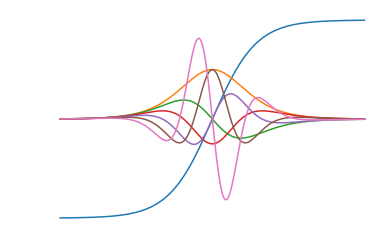

In [3]:
from __future__ import absolute_import
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

'''
Mathematically we can only take gradients of scalar-valued functions, but
autograd's grad function also handles numpy's familiar vectorization of scalar
functions, which is used in this example.
To be precise, grad(fun)(x) always returns the value of a vector-Jacobian
product, where the Jacobian of fun is evaluated at x and the the vector is an
all-ones vector with the same size as the output of fun. When vectorizing a
scalar-valued function over many arguments, the Jacobian of the overall
vector-to-vector mapping is diagonal, and so this vector-Jacobian product simply
returns the diagonal elements of the Jacobian, which is the gradient of the
function at each input value over which the function is vectorized.
'''

def tanh(x):
    return (1.0 - np.exp(-x))  / (1.0 + np.exp(-x))

x = np.linspace(-7, 7, 200)
plt.plot(x, tanh(x),
         x, grad(tanh)(x),                                 # first derivative
         x, grad(grad(tanh))(x),                           # second derivative
         x, grad(grad(grad(tanh)))(x),                     # third derivative
         x, grad(grad(grad(grad(tanh))))(x),               # fourth derivative
         x, grad(grad(grad(grad(grad(tanh)))))(x),         # fifth derivative
         x, grad(grad(grad(grad(grad(grad(tanh))))))(x))   # sixth derivative

plt.axis('off')
plt.savefig("tanh.png")
plt.show()